In [26]:

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from matplotlib import cm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
#Machinig learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve

Punto 1

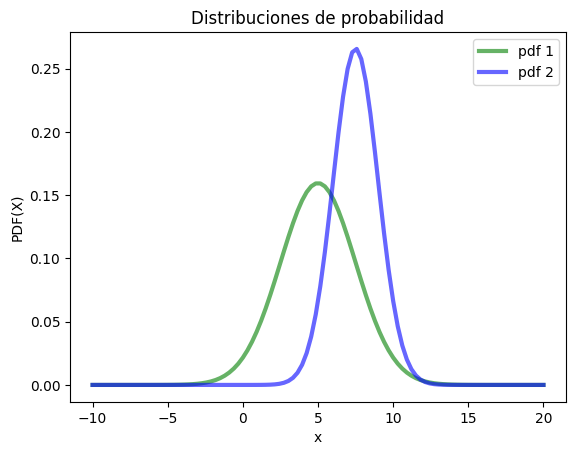

In [2]:

# Definición de media y desviación estandar
mean1, mean2 = 5.0, 7.5
desv1, desv2 =2.5,1.5
# Distribuciones de probabilidad
f1 = stats.norm(loc = mean1, scale = desv1)
f2 = stats.norm(loc = mean2, scale = desv2)

x=np.linspace(-10, 20,100)

# Grafica de f1 y f2
fig, ax = plt.subplots(1, 1)
ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2')
ax.set_xlabel("x")
ax.set_ylabel("PDF(X)")
ax.set_title("Distribuciones de probabilidad")


plt.legend()

Punto 2

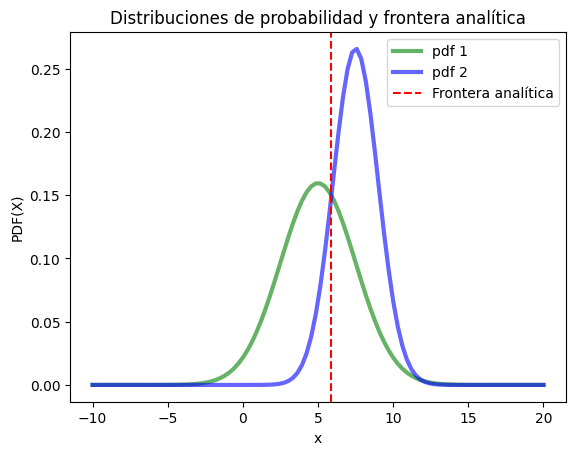

La frontera analítica que separa las dos distribuciones es aproximadamente x = 5.89


In [3]:
# frontera analítica donde las densidades de probabilidad son iguales
def find_boundary(x):
  return f1.pdf(x) - f2.pdf(x)

# Raíz de la función (donde la diferencia es cero)
root = optimize.root_scalar(find_boundary, bracket=[0, 10])
boundary_x = root.root

# Grafica de la frontera
fig, ax = plt.subplots(1, 1)
ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2')
ax.axvline(x=boundary_x, color='red', linestyle='--', label='Frontera analítica')
ax.set_xlabel("x")
ax.set_ylabel("PDF(X)")
ax.set_title("Distribuciones de probabilidad y frontera analítica")
plt.legend()
plt.show()

print(f"La frontera analítica que separa las dos distribuciones es aproximadamente x = {boundary_x:.2f}")


Punto 3

In [4]:
#Generación de muestras aleatorias
m=100
random_1 = f1.rvs(m)
random_2 = f2.rvs(m)

Punto 4

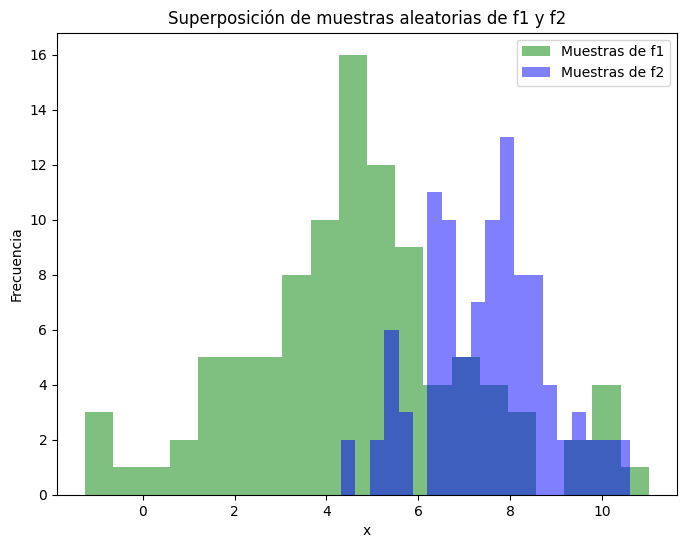

In [5]:
# grafico de superposicion para random_1 y random_2

import matplotlib.pyplot as plt
# Grafico de superposicion para random_1 y random_2
plt.figure(figsize=(8, 6))
plt.hist(random_1, bins=20, alpha=0.5, label='Muestras de f1', color='green')
plt.hist(random_2, bins=20, alpha=0.5, label='Muestras de f2', color='blue')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Superposición de muestras aleatorias de f1 y f2')
plt.legend()
plt.show()


Punto 5

In [6]:
X = np.zeros(2*m)
X[0:m] = random_1
X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

Y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
Y[m:2*m] = np.ones(m)

#  con X y Y hacer un dataframe con columnas de features y leabels

df = pd.DataFrame({'Feature': X, 'Labels': Y})



Punto 6

In [10]:
# Generación 25 muestras de cada distribución para el conjunto de prueba
test_random_1 = f1.rvs(25)
test_random_2 = f2.rvs(25)

#DataFrame de prueba
X_test = np.zeros(50)
X_test[0:25] = test_random_1
X_test[25:50] = test_random_2

Y_test = np.zeros(50)
Y_test[25:50] = np.ones(25)

df_test = pd.DataFrame({'Feature': X_test, 'Labels': Y_test})

Punto 7

In [11]:
def main(X, y, Xr, m):
  #X, y = train_values(100)
  clf = DecisionTreeClassifier(max_depth = 1)
  clf = clf.fit(X.reshape(-1, 1), y)

 # Xr = np.linspace(8,25, 100 ).reshape(-1, 1)
  yr = clf.predict(Xr)


  plt.figure(figsize=(14,1))
  plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
  plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
  plt.plot(X[y==0],np.ones(len(X[y==0])),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
  plt.plot(X[y==1],np.ones(len(X[y==1])),"b.", alpha = 0.4)                      # Valores de test
  plt.yticks([])
  plt.show()

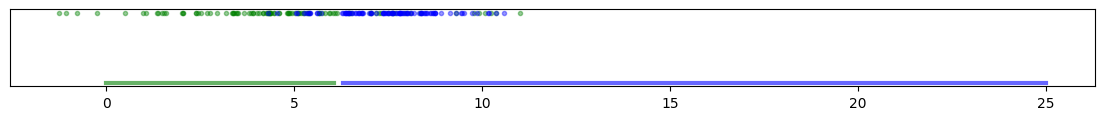

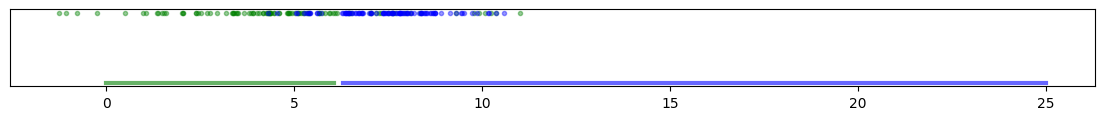

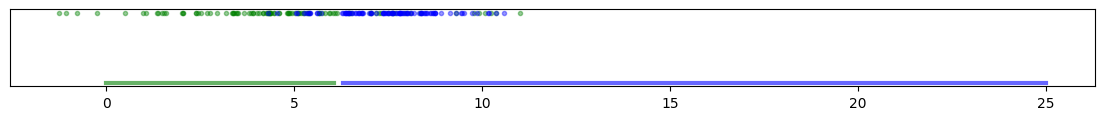

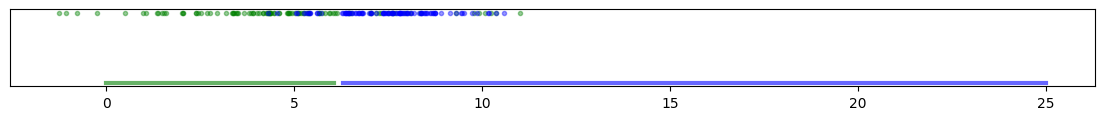

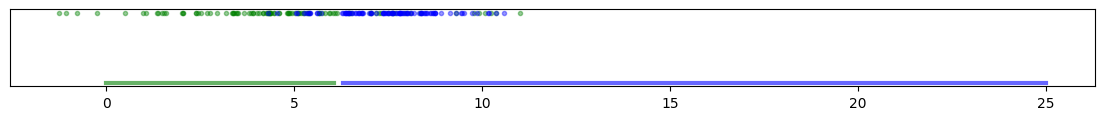

In [12]:
# Para diferentes valores de datos de entrenamiento, el resultado es el siguiente:
m = np.arange(10, 60, 10)

for m_ in m:
  X, y = X, Y
  Xr = np.linspace(0,25, 100 ).reshape(-1, 1)
  main(X, y, Xr,m_)

In [15]:
# Definición del modelo
clf = LinearRegression()

# Ajuste del modelo a los datos
clf.fit(df['Feature'].values.reshape(-1, 1), df['Labels'])
score = clf.score(df['Feature'].values.reshape(-1, 1), df['Labels'])
print(f"El score del modelo es: {score}")


print(f"Coeficiente: {clf.coef_[0]:.2f}")
print(f"Intercepto: {clf.intercept_:.2f}")


El score del modelo es: 0.3243628821973493
Coeficiente: 0.12
Intercepto: -0.21


In [16]:

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df[['Feature']], df['Labels'])


score_dt = clf_dt.score(df_test[['Feature']], df_test['Labels'])

print(f"Decision Tree Classifier Score: {score_dt}")


Decision Tree Classifier Score: 0.7


In [19]:
# Crear una instancia del clasificador SVC
svc_classifier = SVC(kernel="linear", C=0.025)

# Entrenar el modelo con los datos de entrenamiento
svc_classifier.fit(df[['Feature']].values, df['Labels'].values)

# Realizar predicciones en el conjunto de prueba
svc_predictions = svc_classifier.predict(df_test[['Feature']].values)

# Calcular la precisión del modelo
svc_accuracy = accuracy_score(df_test['Labels'].values, svc_predictions)

print("Precisión del modelo SVC:", svc_accuracy)


Precisión del modelo SVC: 0.72


Punto 8

In [24]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}


CV_clf = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv=10)


CV_clf.fit(df[['Feature']], df['Labels'])


print(CV_clf.best_params_)


best_clf = CV_clf.best_estimator_


{'criterion': 'entropy', 'max_depth': 6}


In [27]:
param_grid = {
  'max_depth' : [3,4,5,6,7,8],
  'criterion' :['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}
clf = DecisionTreeRegressor()
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)
CV_clf.fit(df[['Feature']], df['Labels'])

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8]})

Punto 9

In [28]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
  title = "Learning Curves"
  plot_learning_curve(
      regr, title, df[['Feature']], df['Labels'],  ylim=(0.5, 1.01),  n_jobs=4
  )

In [29]:
plot_learning_curve

<function __main__.plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))>

Punto 10

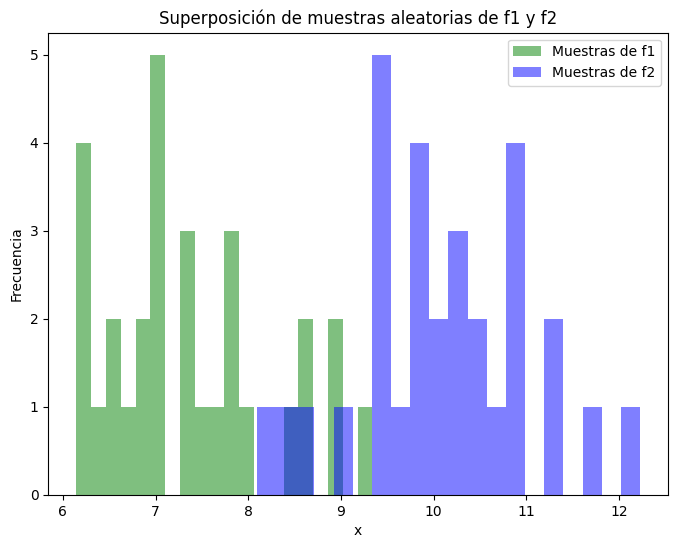

<function __main__.plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))>

In [30]:
# Definición de media y desviación estandar
mean1, mean2 = 7.5, 10
desv1, desv2 = 1, 1
# Distribuciones de probabilidad
f1 = stats.norm(loc = mean1, scale = desv1)
f2 = stats.norm(loc = mean2, scale = desv2)

# Generación de muestras aleatorias
m = 30
random_1 = f1.rvs(m)
random_2 = f2.rvs(m)

# Punto 4
# grafico de superposicion para random_1 y random_2

# Grafico de superposicion para random_1 y random_2
plt.figure(figsize=(8, 6))
plt.hist(random_1, bins=20, alpha=0.5, label='Muestras de f1', color='green')
plt.hist(random_2, bins=20, alpha=0.5, label='Muestras de f2', color='blue')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Superposición de muestras aleatorias de f1 y f2')
plt.legend()
plt.show()

# Punto 5
X = np.zeros(2*m)
X[0:m] = random_1
X[m:2*m] = random_2  # Construccion de vector con la caracteristica 1

Y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
Y[m:2*m] = np.ones(m)

#  con X y Y hacer un dataframe con columnas de features y leabels

df = pd.DataFrame({'Feature': X, 'Labels': Y})

# Definir el modelo
regr = LinearRegression()

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
  title = "Learning Curves"
  plot_learning_curve(
      regr, title, df[['Feature']], df['Labels'],  ylim=(0.5, 1.01),  n_jobs=4
  )
plot_learning_curve
